Что умеет $BFS$:  
+ находить кратчайшие расстояния от вершины start до всех остальных вершин, лежащих в одной компоненте связности с вершиной start  
+ находить все компонетны связности графа
+ находить все вершины и ребра, лежащие на кратчайшем пути между вершинами $v_1$ и $v_2$


Что умеет $DFS$: 
+ находить все компонетны связности графа
+ находить кратчайшие расстояния от вершины start до всех остальных вершин, лежащих в одной компоненте связности с вершиной start 

Продолжим изучение возможностей $DFS$ в приложении с к особой разновидности графов - деревьям.

Дерево - это ***связный ациклический*** граф.  
Дерево - это ***связный*** граф, состоящий из **$n$** вершин и $n - 1$ ребра. 

Пользуясь вторым определением, можно легко проверить, является граф, состоящий из $n$ вершин деревом или нет.  
Как?  
1. Запускаем $DFS$ из какой-нибудь вершины.  
2. Если после отработки $DFS$ все $n$ вершин оказались посещены и количество ребер в графе равно $n - 1$, то граф - дерево.

### Корневое или подвешенное дерево.

graph (10).png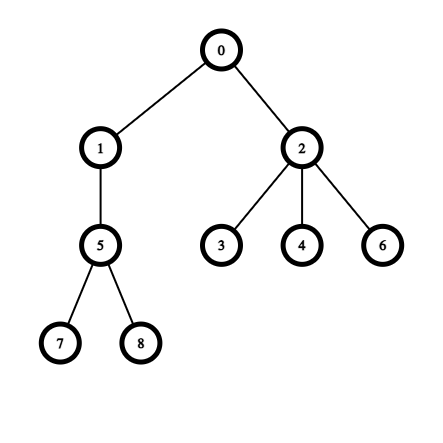

При решении задач практически всегда возникает необходимость работать с ***корневыми*** деревьями.  

***Корневым*** или ***подвешенным*** деревом называется дерево с одной выделенной вершиной 𝑟𝑜𝑜𝑡  - корнем дерева  (практически всегда  𝑟𝑜𝑜𝑡=$1$ ). Для корневого дерева можно ввести следующие понятия:

* $h[v]$ - ***высота*** вершины $v$ ($height[v]$), равняется расстоянию от вершины $root$ до вершины $v$. Например, $h[root]$ всегда равно $0$, а в дереве на рисунке выше при $root = 1$, $h[8] = 3$, $h[5] = 2$;

* $p[v]$ - ***предок*** вершины $v$ ($parent[v]$), а именно единственная вершина на высоте $h[v] - 1$, соединенная ребром с вершиной $v$. Для удобства считается, что $p[root] = root$. Например, в дереве на рисунке выше $p[1] = 1$, $p[8] = 6$, $p[5] = 3$;


* $subtree$ of $v$ - ***поддерево*** вершины $v$, а именно множество всех вершин, в которые можно добраться из $v$, не проходя через вершину $p[v]$. В частности, поддерево вершины $root$ всегда является полным множеством всех вершин дерева.  
В дереве на рисунке выше $subtree(1)$ = {$1, 2, 3, 4, 5, 6, 7, 8, 9$}, $subtree(6)$ = {$6, 8, 9$}, $subtree(5)$ = {$5$};


* $sz[v]$ - ***размер поддерева*** вершины $v$ ($size[v]$), а именно кол-во вершин в поддереве вершины $v$.

Зададим граф списком смежности и инициализируем вспомогательные структуры:

In [9]:
g = [[1, 2], [0, 5], [0, 3, 4, 6], [2], [2], [1, 7, 8], [2], [5], [5]]
n = len(g)
used = [0] * n
h = [-1] * n
p = [-1] * n
sz = [0] * n
root = 0
p[root] = root
h[root] = root

#### Задание №1.

Для каждой вершины $v$ дерева на рисунке $10$ вручную выписать $h[v]$, $p[v]$, $subtree(v)$, $sz[v]$.
  
Массив высот:                h = []  
Массив предков                p = []   
Список поддеревьев  
Массив размера поддеревьев      sz = []

Массив высот: h = [0, 1, 1, 2, 2, 2, 2, 3, 3]  

Массив предков p = [0, 0, 0, 2, 2, 1, 2, 5, 5]  

Массив размера поддеревьев sz = [9, 4, 4, 1, 1, 3, 1, 1, 1]


#### Задание №2.

Написать программу, которая выполняет ***dfs*** обход дерева, автоматически подсчитывая массивы $h$, $p$, $sz$.  
Программа должна считывать $n$ и $root$ в первой строке, а затем $(n - 1)$ строку - ребра дерева, а выводить $3$ массива - $h$, $p$, $sz$. 

Запустить программу на тесте, соответствующем рисунку $10$, и убедиться,  
что массивы $h$, $p$, $sz$ совпадают с массивами, найденными в задании №$1$.

#### Обход дерева.

Базовая реализация ***dfs***:

In [10]:
def dfs(v):
    used[v] = 1
    for to in g[v]:
        if not used[to]:
            dfs(to)


dfs(root)

print(f'Массив высот: h = {h}')
print(f'Массив предков p = {p}')
print(f'Массив размера поддеревьев sz = {sz}')

Массив высот: h = [0, -1, -1, -1, -1, -1, -1, -1, -1]
Массив предков p = [0, -1, -1, -1, -1, -1, -1, -1, -1]
Массив размера поддеревьев sz = [0, 0, 0, 0, 0, 0, 0, 0, 0]


* Для того, чтобы обойти все вершины дерева, достаточно реализовать рекурсивную функцию ***dfs***$(v)$, которая будет обходить все вершины поддерева $v$.  
Для этого достаточно перебрать все смежные с вершиной $v$ вершины $to$ и в случае если $to \neq p[v]$, нужно выставить предка вершины $to$ $(p[to] = v)$ и запустить ***dfs***$(to)$.  

* Такая реализация ***dfs*** на дереве автоматически подсчитывает массив предков $p$.

In [17]:
def dfs(v):
    #used[v] = 1
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)


dfs(root)

print(f'Массив высот: h = {h}')
print(f'Массив предков p = {p}')
print(f'Массив размера поддеревьев sz = {sz}')

Массив высот: h = [0, 1, 1, 2, 2, 2, 2, 3, 3]
Массив предков p = [0, 0, 0, 2, 2, 1, 2, 5, 5]
Массив размера поддеревьев sz = [9, 4, 4, 1, 1, 3, 1, 1, 1]


* Для того чтобы посчитать массив высот $h$, необходимо перед вызовом ***dfs***($to$) просто присвоить $h[to] = h[v] + 1$. 

In [18]:
def dfs(v):
    #used[v] = 1
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            h[to] = h[v] + 1
            dfs(to)


dfs(root)

print(f'Массив высот: h = {h}')
print(f'Массив предков p = {p}')
print(f'Массив размера поддеревьев sz = {sz}')

Массив высот: h = [0, 1, 1, 2, 2, 2, 2, 3, 3]
Массив предков p = [0, 0, 0, 2, 2, 1, 2, 5, 5]
Массив размера поддеревьев sz = [9, 4, 4, 1, 1, 3, 1, 1, 1]


* Для подсчета массива $sz$ можно воспользоваться рекуррентной формулой: $sz[v] = 1 + \sum_{to \neq p[v]} sz[to]$.

In [13]:
def dfs(v):
    sz[v] = 1
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            h[to] = h[v] + 1
            dfs(to)
            sz[v] += sz[to] 


dfs(root)

print(f'Массив высот: h = {h}')
print(f'Массив предков p = {p}')
print(f'Массив размера поддеревьев sz = {sz}')

Массив высот: h = [0, 1, 1, 2, 2, 2, 2, 3, 3]
Массив предков p = [0, 0, 0, 2, 2, 1, 2, 5, 5]
Массив размера поддеревьев sz = [9, 4, 4, 1, 1, 3, 1, 1, 1]


#### Задание №3.

Не запуская программу, написанную в задании №$2$, выпишите порядок вершин, в котором функция dfs посетит все вершины дерева.  

**Ответ:** $0\rightarrow1\rightarrow5\rightarrow7\rightarrow8\rightarrow2\rightarrow3\rightarrow4\rightarrow6$			

####  Задание №4.

Модифицируйте программу, написанную в задании №$2$ так, чтобы она находила и выводила массив $order$ - список всех вершин в порядке посещения. Убедитесь, что полученный массив $order$ совпадает с порядком вершин, выписанным в задании №$3$.


In [16]:
def dfs(v):
    order.append(v)
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)
            
order = []
dfs(root)
print(order)

[0, 1, 5, 7, 8, 2, 3, 4, 6]


#### Определение:

+ Назовем **tin[v]** ($time$_$in[v]$) - время входа в вершину $v$ в процессе обхода дерева.  
  А именно, **tin[v]** - это позиция вершины $v$ массиве $order$.   

+ Аналогично скажем, что **tout[v]** - это время выхода из вершины $v$ в процессе обхода дерева.  
  А именно, **tout[v]** - это самая правая позиция какой-то вершины $x \in subtree(v)$в массиве $order$.


#### Задание №5.

Выпишите, чему равны массивы **tin** и **tout** для дерева, соответствующего рисунку $1$.

#### Решение:

**tin** =   $[0, 1, 5, 6, 7, 2, 8, 3, 4]$	

**tout** = $[8, 4, 8, 6, 7, 4, 8, 3, 4]	$

#### Задание №6.

Модифицируйте программу, написанную в задании №$4$ так, чтобы она находила выводила массивы **tin** и **tout**.  
Убедитесь, что полученные массивы совпадают с соответствующими массивами, выписанным в задании №$5$.

Для того, чтобы посчитать значения **tin[v]**, достаточно в самом начале функции **dfs** присвоить $tin[v] = len(order)$.  
Аналогично, для подсчета значений **tout[v]**, достаточно в конце функции **dfs** присвоить $tout[v] = len(order) - 1$.

In [21]:
def dfs(v):
    tin[v] = len(order)
    order.append(v)
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)
    tout[v] = len(order) - 1
    

In [23]:
order = []
tin = [0] * n
tout = [0] * n
dfs(root)
print([i for i in range(9)])
print(order)
print(tin)
print(tout)


[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 5, 7, 8, 2, 3, 4, 6]
[0, 1, 5, 6, 7, 2, 8, 3, 4]
[8, 4, 8, 6, 7, 4, 8, 3, 4]


Если посмотреть внимательно на массивы **tin** и **tout**, то можно заметить, что подотрезок массива $order$ от **tin[v]** до **tout[v]** будет представлять собой все вершины из поддерева $v$.


#### Задание №7.

Используя массивы **tin** и **tout** вывести список вершин $subtree(v)$ для каждой вершины $v$.

#### Решение:

$subtree(v) =  [[1, 2, 6, 8, 9, 3, 4, 5, 7], [2, 6, 8, 9], [3, 4, 5, 7], [4], [5], [6, 8, 9], [7], [8], [9]]$

In [27]:
for v in range(n):
    print(f'subtree({v}) = {order[tin[v]:tout[v] + 1]}')

subtree(0) = [0, 1, 5, 7, 8, 2, 3, 4, 6]
subtree(1) = [1, 5, 7, 8]
subtree(2) = [2, 3, 4, 6]
subtree(3) = [3]
subtree(4) = [4]
subtree(5) = [5, 7, 8]
subtree(6) = [6]
subtree(7) = [7]
subtree(8) = [8]


#### Проверка того, что одна вершина является предком другой.

Если вершина $a$ является предком вершины $b$, то поддерево вершины $a$ содержит все вершины из поддерева $b$: $subtree(b) \subset subtree(a)$.

Поскольку поддерево любой вершины $v$ однозначно задается отрезком $[tin[v], tout[v]]$, то получаем простой критерий того, что вершина $a$ является предком $b$: 

+ $tin[a] \leq tin[b] \leq tout[b] \leq tout[a]$

#### Задание №8.

Реализовать функцию $is\_ancestor(a, b)$, которая возвращает $True$, если вершина $a$ является предком $b$, и $False$ в противном случае. Вывести значение данной функции для всех пар вершин $u$, $v$.

In [28]:
def is_ancestor(a, b):
    return tin[a] <= tin[b] <= tout[b] <= tout[a]

In [29]:
for i in range(n):
    for j in range(n):
        print(1 if is_ancestor(i, j) else 0, end=' ')
    print()

1 1 1 1 1 1 1 1 1 
0 1 0 0 0 1 0 1 1 
0 0 1 1 1 0 1 0 0 
0 0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 1 1 
0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 


#### Задание №9. 

Сдать задачу “Предок” (e-olimp № $1941$).

In [16]:
#TODO

#### Определение:

+ **Наименьшим общим предком** ($least$ $common$ $ancestor$) двух вершин $a$ и $b$ называется такая вершина $c$, которая одновременно является и предком $a$, и предком $b$, а ее высота $h[c]$ - максимально возможная (находится как можно дальше от $root$).
    

#### Задание №10.

Постройте вручную табличку, в которую запишите значение наименьшего общего предка для каждой пары вершин $a$, $b$.